<a href="https://colab.research.google.com/github/champsleague/Machine-Learning-Projects/blob/main/ML_phw1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving bcancer.data to bcancer.data


In [3]:
import io
import pandas as pd
import numpy as np
import pandas as pd

df = pd.read_csv(io.StringIO(uploaded['bcancer.data'].decode('utf-8')))
df = df.replace('?', np.nan)
df.dropna()

,code number,clump thickness,Uniformity of cell size,Uniformity of cell shape,Marginal adhesion,single epithelial cell size,Bare Nuclei,Bland chromatin,Normal Nucleoli,Mitosis,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4


In [2]:
import io
import pandas as pd
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn import preprocessing

df = pd.read_csv(io.StringIO(uploaded['bcancer.data'].decode('utf-8')))
df = df.replace('?', np.nan)
df.dropna()


# scale features
scaler = StandardScaler()
model = scaler.fit(df)
df_standard = model.transform(df)
 
# print StandardScaler data
print(df_standard,'\n\n\n')


# scale features
scaler = MinMaxScaler()
model=scaler.fit(df)
df_minmax=model.transform(df)
 
# print scaled features
print(df_minmax,'\n\n\n')



# scale features
scaler = MaxAbsScaler()
model=scaler.fit(df)
df_maxabs=model.transform(df)
 
# print scaled features
print(df_maxabs,'\n\n\n')



# scale features
scaler = RobustScaler()
model=scaler.fit(df)
df_robust=model.transform(df)
 
# print scaled features
print(df_robust,'\n\n\n')



# scale features
df_normalize = (df - df.min())/ (df.max() - df.min())
print(df_normalize)

[[-0.11623873  0.20693572 -0.69999505 ... -0.61182504 -0.34391178
  -0.72539705]
 [-0.1115035   0.20693572  0.28384518 ... -0.28411186 -0.34391178
  -0.72539705]
 [-0.09126525 -0.50386559 -0.69999505 ... -0.61182504 -0.34391178
  -0.72539705]
 ...
 [-0.29657482  0.20693572  2.25152563 ...  2.33759359  0.23956962
   1.37855538]
 [-0.28254589 -0.14846494  1.59563215 ...  1.02674087 -0.34391178
   1.37855538]
 [-0.28254589 -0.14846494  1.59563215 ...  0.37131451 -0.34391178
   1.37855538]] 



[[0.07006726 0.44444444 0.         ... 0.         0.         0.        ]
 [0.07028528 0.44444444 0.33333333 ... 0.11111111 0.         0.        ]
 [0.07121713 0.22222222 0.         ... 0.         0.         0.        ]
 ...
 [0.06176386 0.44444444 1.         ... 1.         0.11111111 1.        ]
 [0.06240981 0.33333333 0.77777778 ... 0.55555556 0.         1.        ]
 [0.06240981 0.33333333 0.77777778 ... 0.33333333 0.         1.        ]] 



[[0.07432725 0.5        0.1        ... 0.1        0.1   

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:56: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.


accuracy of decision tree (entropy):  0.35


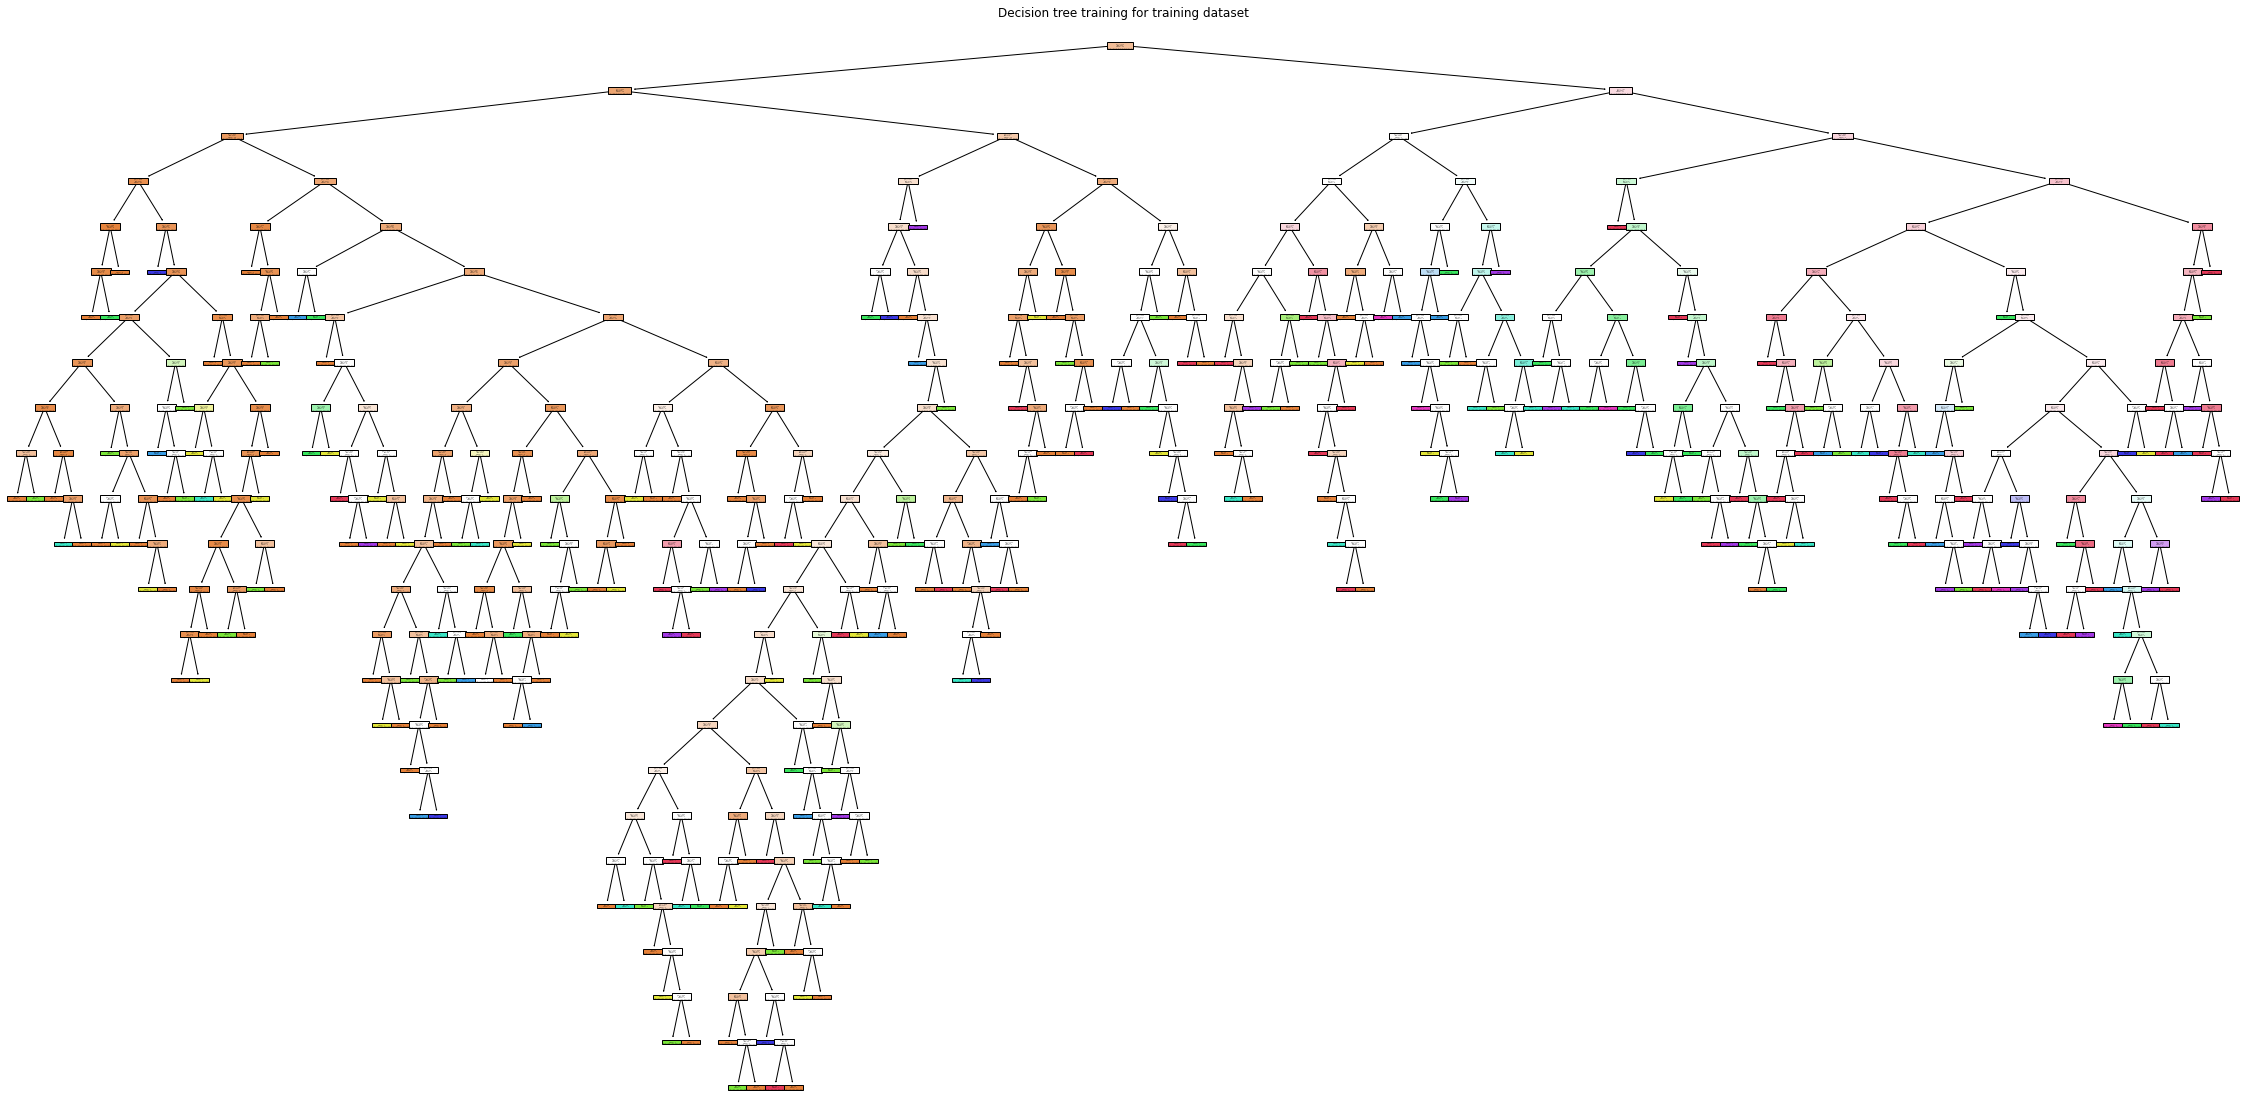

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

df = pd.read_csv(io.StringIO(uploaded['bcancer.data'].decode('utf-8')))
df = df.replace('?', np.nan)
df.dropna()


# splitting the dataset into input and output datasets
X = df.iloc[:, [0,1]].values
y = df.iloc[:, 2].values

# splitting the dataaset into Training and Testing Data 
from sklearn.model_selection import train_test_split

# random state is 0 and test size if 20%
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)


# importing standard scalling method from sklearn
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

# providing the inputs for the scaling purpose
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# importing decision tree algorithm
from sklearn.tree import DecisionTreeClassifier

# entropy means information gain
classifer = DecisionTreeClassifier(criterion='entropy', random_state=0)

# criterion = gini
# classifer = DecisionTreeClassifier(criterion='gini', random_state=0)

# providing the training dataset
classifer.fit(X_train,y_train)

y_pred = classifer.predict(X_test)

# importing the accuracy score
from sklearn.metrics import accuracy_score

# accuracy
print('accuracy of decision tree (entropy): ',accuracy_score(y_pred,y_test))
# print('accuracy of decision tree (gini): ',accuracy_score(y_pred,y_test))


# importing the plot tree method
from sklearn.tree import DecisionTreeClassifier, plot_tree
clf = DecisionTreeClassifier()

# output size of decision tree
plt.figure(figsize=(40,20))

# providing the training dataset
clf = clf.fit(X_train, y_train)
plot_tree(clf, filled=True)
plt.title("Decision tree training for training dataset")
plt.show()


accuracy :  0.4785714285714286


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  UserWarning,


[0.6        0.6        0.61428571 0.61428571 0.54285714 0.61428571
 0.57142857 0.64285714 0.62857143 0.57971014]


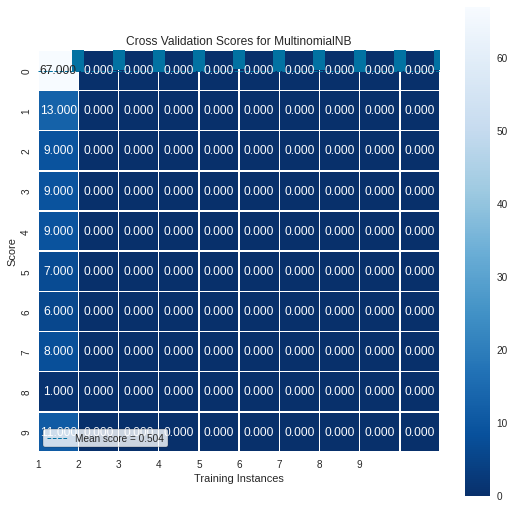

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import StratifiedKFold
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score
from yellowbrick.datasets import load_occupancy
from yellowbrick.model_selection import CVScores

df = pd.read_csv(io.StringIO(uploaded['bcancer.data'].decode('utf-8')))
df = df.replace('?', np.nan)
df.dropna()


# splitting the dataset into input and output datasets
X = df.iloc[:, [0,1]].values
y = df.iloc[:, 2].values

# splitting the dataaset into Training and Testing Data 
from sklearn.model_selection import train_test_split

# random state is 0 and test size if 20%
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)

# Make an instance of the Model
logisticRegr = LogisticRegression()
logisticRegr.fit(X_train, y_train)


# Returns a NumPy Array
# Predict for One Observation (image)
logisticRegr.predict(X_test[0].reshape(1,-1))
logisticRegr.predict(X_test[0:10])
predictions = logisticRegr.predict(X_test)


# Use score method to get accuracy of model
accuracy = logisticRegr.score(X_test, y_test)
print('accuracy : ',accuracy)

cm = metrics.confusion_matrix(y_test, predictions)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy: {0}'.format(accuracy)
plt.title(all_sample_title, size = 15);


cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
model = MultinomialNB()
clf = model.fit(X,y)

scores = cross_val_score(clf, X, y, cv=cv)
print(scores)
visualizer = CVScores(model, cv=cv, scoring='f1_weighted')
visualizer.fit(X, y)        
visualizer.show()  

In [ ]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn import svm
from sklearn.metrics import confusion_matrix, accuracy_score 
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd
import io   

df = pd.read_csv(io.StringIO(uploaded['bcancer.data'].decode('utf-8')))
df = df.replace('?', np.nan)
df.dropna()


# splitting the dataset into input and output datasets
X = df.iloc[:, [0,1]].values
y = df.iloc[:, 2].values

# splitting the dataaset into Training and Testing Data 
from sklearn.model_selection import train_test_split

# random state is 0 and test size if 25%
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=0)

clf = svm.SVC(kernel='linear',C=1).fit(X_train,y_train)

classifier_predictions = clf.predict(X_test)
print('accuracy of SVM : ',accuracy_score(y_test,classifier_predictions)*100)




accuracy :  [0.59285714 0.60714286 0.57857143 0.61428571 0.5971223 ]


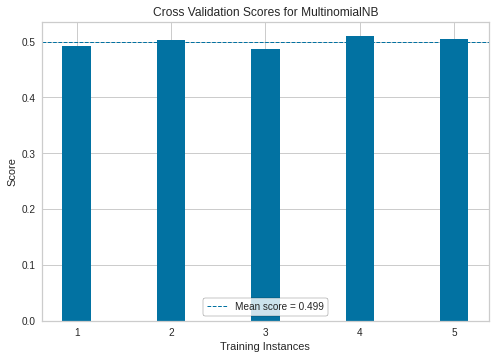

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import io
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import StratifiedKFold
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score
from yellowbrick.datasets import load_occupancy
from yellowbrick.model_selection import CVScores

df = pd.read_csv(io.StringIO(uploaded['bcancer.data'].decode('utf-8')))
df = df.replace('?', np.nan)
df.dropna()


# splitting the dataset into input and output datasets
X = df.iloc[:, [0,1]].values
y = df.iloc[:, 2].values

# splitting the dataaset into Training and Testing Data 
from sklearn.model_selection import train_test_split

# random state is 0 and test size if 20%
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)

# Use the k-fold method, with k=10.
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Use the k-fold method, with k=5.
# cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Use the k-fold method, with k=3.
# cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# define and build the model
model = MultinomialNB()
clf = model.fit(X,y)

accuracy = cross_val_score(clf, X, y, cv=cv)
print('accuracy : ',accuracy)

visualizer = CVScores(model, cv=cv, scoring='f1_weighted')
visualizer.fit(X, y)        
visualizer.show()  